# Background

This dataset was obtained from UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Adult). The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994

The variables present in the dataset are as follows - 

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


# Part 1: Data and Libraries Setup

In [1]:
#Importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Silencing warnings 

import warnings
warnings.filterwarnings('ignore')
pd.set_option('mode.chained_assignment',None) #Silencing the Setting with Copying Warning

In [2]:
%matplotlib inline

In [3]:
filename = 'adult.data'
df = pd.read_csv(filename,header=None)

In [4]:
header = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation',
       'relationship','race','sex','capital-gain','capital-loss','hours-per-week',
        'native-country','salary']
df.columns = header

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Part 2: Data Pre-Processing

In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Distribution of Target Variable:**

76% of the population earns below 50K USD which indicates an unequal distribution of the target variable. We will have to consider this while training our ML model

In [8]:
df['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [9]:
df['salary'].value_counts(normalize=True)

 <=50K    0.75919
 >50K     0.24081
Name: salary, dtype: float64

**Identifying categorical and numerical variables separately**

This will help us in using the suitable type of plots to visualise each variable later during EDA

In [10]:
cols_df = pd.DataFrame(df.dtypes)
num_cols = list(cols_df[cols_df[0]=='int64'].index)
cat_cols = list(cols_df[cols_df[0]=='object'].index)[:-1] #excluding target column of salary 
print('Numeric variables includes:','\n',num_cols)
print('\n')
print('Categorical variables includes','\n',cat_cols)

Numeric variables includes: 
 ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


Categorical variables includes 
 ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


**Removing whitespaces from categorical variables**: The below output shows us that all categorical variables and target variable have whitespaces. Let us clean this first before looking at missing values

In [11]:
for i in cat_cols:
    print(i,'\n',df[i].unique())
    print()

workclass 
 [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

education 
 [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

marital-status 
 [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation 
 [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

relationship 
 [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

race 
 [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

sex 
 [' Male' ' Female']

native-country 
 [' United-States' ' Cuba

In [12]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [13]:
#Using pandas .strip() function to remove both right and left whitepsace
for i in cat_cols:
    df[i] = df[i].str.strip()
    
df['salary'] = df['salary'].str.strip()

In [14]:
for i in cat_cols:
    print(i,'\n',df[i].unique())
    print()

workclass 
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

education 
 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

marital-status 
 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation 
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

relationship 
 ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

race 
 ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

sex 
 ['Male' 'Female']

native-country 
 ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Hondur

**Treating Missing Values**

In [15]:
# Data description mentions that unknown values are repalced with '?'. Let us check counts for it

for i in list(df.columns):
    print(i,df[df[i]=='?'][i].count())

age 0
workclass 1836
fnlwgt 0
education 0
education-num 0
marital-status 0
occupation 1843
relationship 0
race 0
sex 0
capital-gain 0
capital-loss 0
hours-per-week 0
native-country 583
salary 0


In [16]:
#Replacing '?' string with NaN values
df.replace(to_replace='?',value=np.nan,inplace=True)

In [17]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

All 3 variables with missing values are categorical in nature. As we have a larger number of available observations, let us drop these observations and use rest of the data for analysis

In [18]:
df.dropna(axis=0,inplace=True)

# Part 3: Exploratory Data Analysis:

This section is split into 2 parts where visualisations are bifurcated depending on the variable type - numeric and categorical

## Numeric Variables

**1. Pairplot observations**

- Less than 50k salary bracket is skewed towards younger population whereas more than 50k salary is comprised of older population
- Age and education seem to have some positive correlation which has a direct impact on the salary i.e. older and more educated people fall in the higher salary bracket 

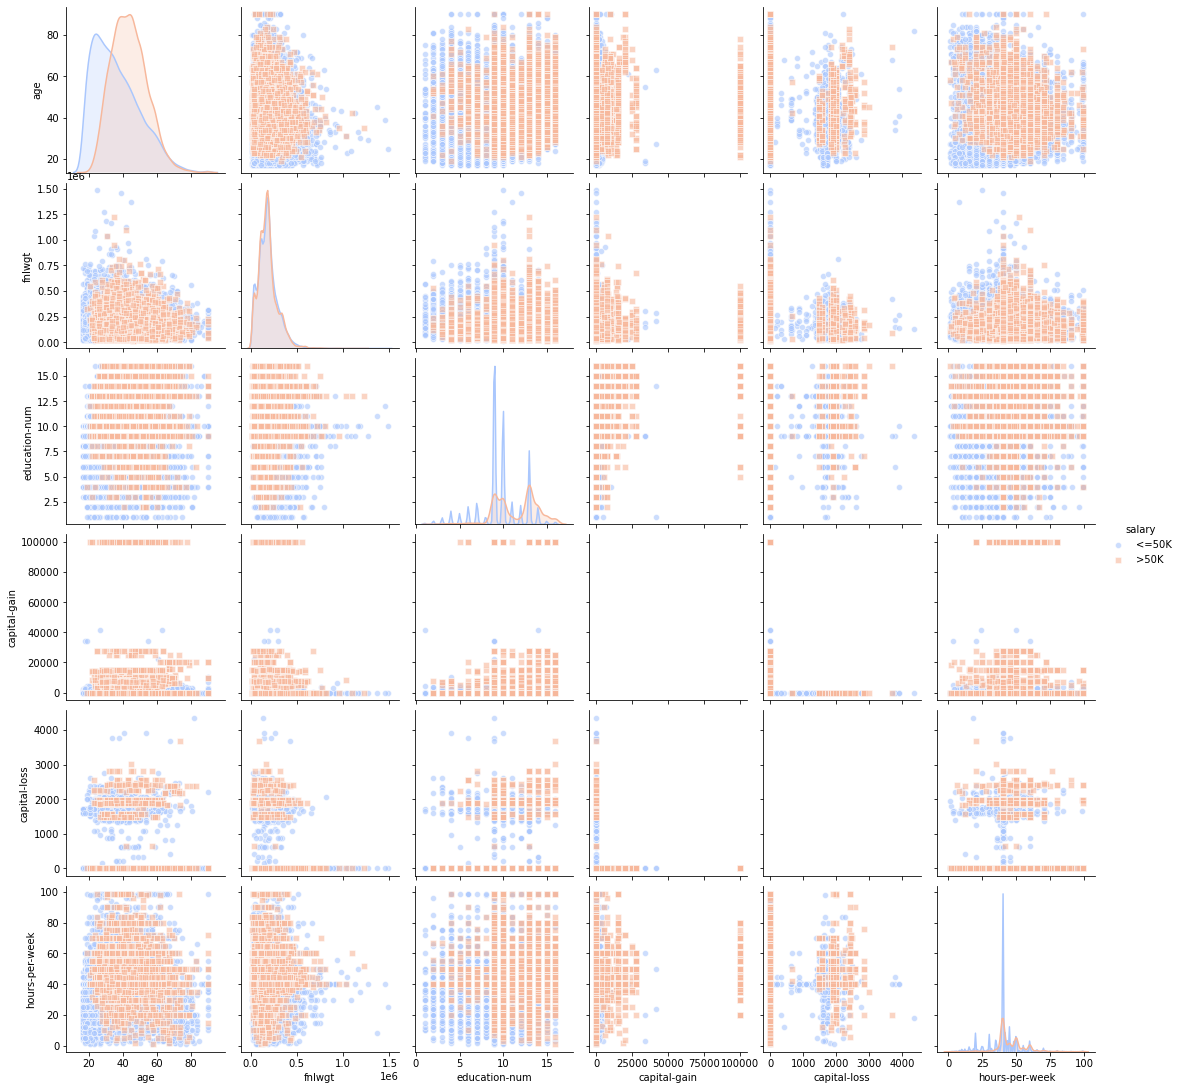

In [19]:
sns.pairplot(df,palette='coolwarm',hue='salary',markers=["o", "s"],plot_kws={'alpha': 0.6})
plt.show()

**2. Correlation between numberic variables:** There is no strong positive or negative correlation between these variables. Thus we are unlikely to run into any multi-collinearity issues in the model

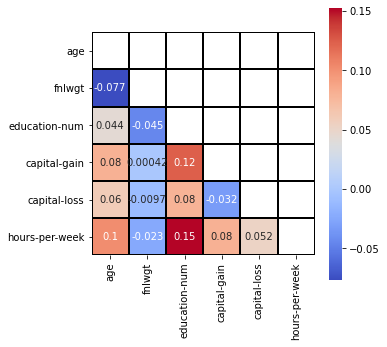

In [20]:
plt.figure(figsize=(5,5))
correlation = df.corr()
matrix = np.triu(correlation)
sns.heatmap(correlation,cmap='coolwarm',square=True,linecolor='black',linewidths=1,
            mask=matrix,annot=True)
plt.show()

**3. Histograms for each variable:** 

- In line with pairplot observations, younger population falls under the lower income category whereas the age distribution for above 50K income is normally distributed
- The mean observation of education level is higher for the above 50k income group with most observations falling above education level of 9 
- Capital gain and capital loss have largely zero values hence we will exclude it from our feature matrix
- Also, fnlwgt by definition is a control parameter kept in the census data. We may need to exclude it later from our model depending on it's impact on performance
- Majority of lower income group individuals work for less than 40 hours whereas the higher income group individuals have a more right skewed distribution of working hours  

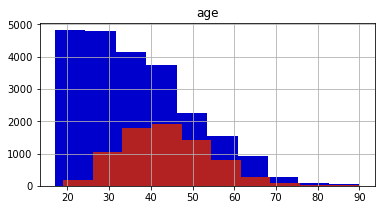

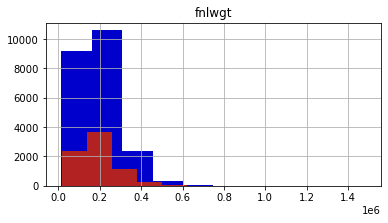

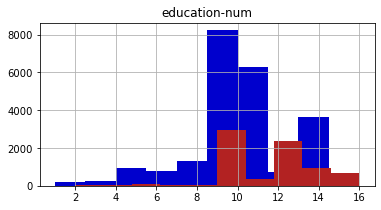

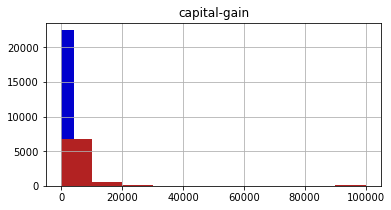

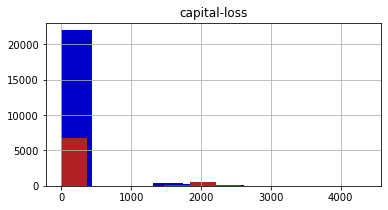

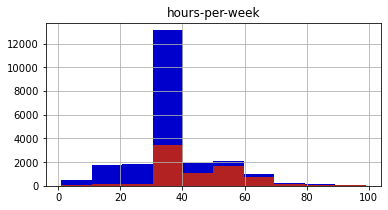

In [21]:
for i in num_cols:
    plt.figure(figsize=(6,3))
    df[df['salary']=='<=50K'][i].hist(color='mediumblue')
    df[df['salary']=='>50K'][i].hist(color='firebrick')
    plt.title(i)
    plt.show()

## Categorical Variables

**Count plot observations**: We are only looking at top 6 categories for each variable on different salary levels and total level (for benchmarking our observations) 

- Leading attributes of <=50K income group:
    - No clear distinction on the workclass since both groups are majorly employed in the private sector
    - High school or some college graduates
    - Unmarried (could be partly due to younger age)
    - Common occupation includes craft/repair, admin-clerical and other services (may be unorganised in nature)
    - Equal proportion of individuals who are not in a family setting and are husbands
    - Race distribution is similar to overall population distribution for this group 
    - Gender and native country follow a pattern similar to the entire population for both the groups (i.e. largely males from USA itself) 


- Leading attributes of >50K income group:
    - Largely employed in the private sector
    - More frequenct bachlor degree holders (in line with our observation on higher education level)
    - Significant proportion is married and living with a spouse
    - These individuals hold highly specialised positions in the workforce like executive management and prof-specialty (which partly explain the higher income)
    - Most play an active family role as a husband or wife
    - Whites dominate this income group, however it should be noted this is also the general population distribution

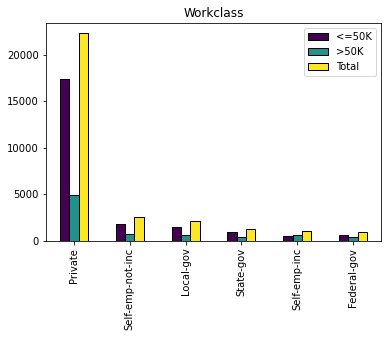

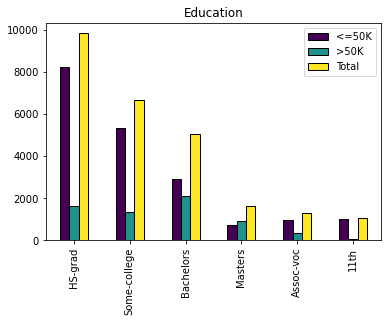

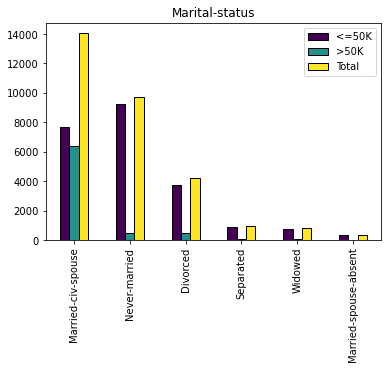

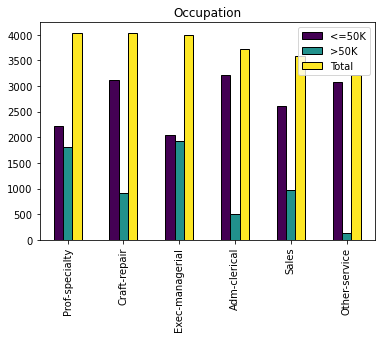

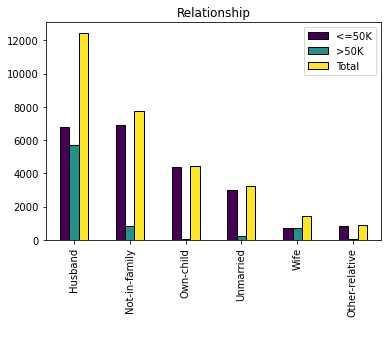

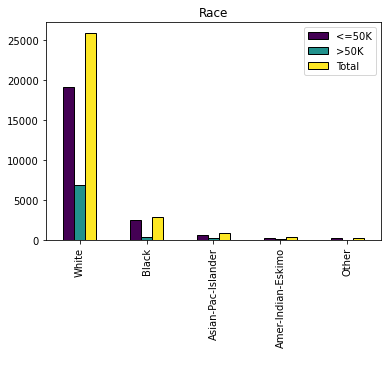

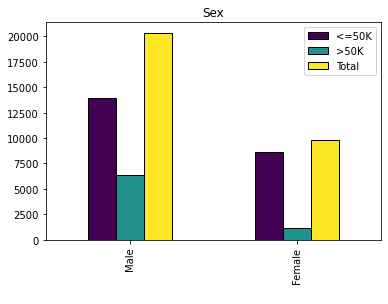

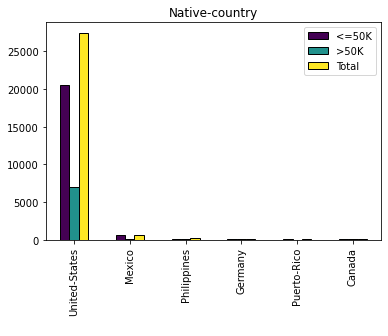

In [22]:
# Instead of using sns.catplot() we use the below loop to create a cross tab 
# which will also include the total column for better comparison

for i in cat_cols:
    ct = pd.crosstab(df[i],df['salary'],margins=True, margins_name="Total")
    ct.drop(labels='Total',axis=0,inplace=True) #Removing subtotal row 
    ct.sort_values(by='Total',ascending=False,inplace=True) #Sorting based on total column
    #Selecting only top 6 categories for plotting
    ct.iloc[:6,:].plot(kind='bar',colormap='viridis',edgecolor='black')  
    plt.xlabel(' ')
    plt.title(str(i).capitalize())
    plt.legend(loc=1)
    plt.show()

# Part 4: Feature Selection

In [23]:
df['salary'].replace(to_replace='<=50K',value=0,inplace=True)
df['salary'].replace(to_replace='>50K',value=1,inplace=True)

In [24]:
#Identifying categorical columns where more than 90% of observations belong only to one categroy

cat_drop = []
for i in cat_cols:
    if (df[i].value_counts(normalize=True)[0]) > 0.9:
        cat_drop.append(i)
        
print(cat_drop)

['native-country']


In [25]:
#Similarly for numerical columns

num_drop = []
for i in num_cols:
    if df[i].value_counts(normalize=True).iloc[0] > 0.9:
        num_drop.append(i)
        
print(num_drop)

['capital-gain', 'capital-loss']



- In native country close to 91% of observations belong to one category (i.e. United States)
- Whereas in capital-gain and capital-loss, ~92% and ~95% of values are zeroes respectively which will not contribute in modelling

Hence, we **drop these 3 variables (native-country, capital-gain, capital-loss)** from the feature matrix

In [26]:
X = df.drop(labels = cat_drop + num_drop + ['salary'],axis=1)
y = df['salary']

In [27]:
X.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13


In [28]:
y.value_counts()

0    22654
1     7508
Name: salary, dtype: int64

Let us take a look at education-num and education as these variables are largely similar in nature

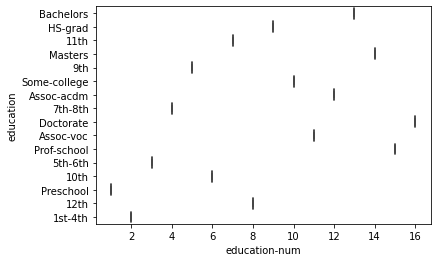

In [29]:
sns.boxplot('education-num','education',data=df)
plt.show()

In [30]:
ed_cross = pd.crosstab(df['education-num'],df['education'])

In [31]:
ed_cross

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
education-num,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,45,0,0
2,0,0,0,151,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,288,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,557,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,455,0,0,0,0,0,0,0,0,0
6,820,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,1048,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,377,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,9840,0,0,0,0


Above cross tab shows that each education number corresponds to an education level and represents the same data. Hence, we **drop the education column** from our feature matrix to avoid redundant data 

In [32]:
X.drop('education',axis=1,inplace=True)

We also **drop fnlwgt column** as it is only a standardisation parameter and fails to give us any direction during model interpretation

In [33]:
X.drop('fnlwgt',axis=1,inplace=True)

# Part 5: Feature Engineering

In this section, we will attempt to simplify our input parameters (features) as we have many categorical variables with higher number of unique values 

**1. Workclass**

74% of individuals work in the private sector. Let us consolidate all other categories under a common head of 'Non-Private'

In [34]:
X['workclass'].value_counts(normalize=True)*100

Private             73.887673
Self-emp-not-inc     8.285260
Local-gov            6.852994
State-gov            4.240435
Self-emp-inc         3.560772
Federal-gov          3.126451
Without-pay          0.046416
Name: workclass, dtype: float64

In [35]:
#Listing all options other than private
to_replace = list(X['workclass'].unique())
to_replace.remove('Private')

#Placing all other categories under one bracket
X.replace(to_replace,'Non-Private',inplace=True)
X['workclass'].value_counts(normalize=True)*100

Private        73.887673
Non-Private    26.112327
Name: workclass, dtype: float64

**2. Race**

86% of individuals are whites hence let us club all other races under a common 'Other' bracket to reduce the number of categories

In [36]:
X['race'].value_counts(normalize=True)*100

White                 85.979046
Black                  9.339566
Asian-Pac-Islander     2.967310
Amer-Indian-Eskimo     0.948213
Other                  0.765864
Name: race, dtype: float64

In [37]:
#Listing all options other than white
to_replace = list(X['race'].unique())
to_replace.remove('White')

#Placing all other categories under one bracket
X.replace(to_replace,'Other',inplace=True)
X['race'].value_counts(normalize=True)*100

White    85.979046
Other    14.020954
Name: race, dtype: float64

**3. Marital Status**

In [38]:
X['marital-status'].value_counts(normalize=True)*100

Married-civ-spouse       46.631523
Never-married            32.245872
Divorced                 13.971222
Separated                 3.113189
Widowed                   2.741861
Married-spouse-absent     1.226709
Married-AF-spouse         0.069624
Name: marital-status, dtype: float64

In [39]:
#Let us consolidate all options where individuals were married at least once (i.e. all options other than never-married)
to_replace = list(X['marital-status'].unique())
to_replace.remove('Never-married')

#Placing all other categories under one bracket
X.replace(to_replace,'Married',inplace=True)

#Renaming the 'Never-married' category to 'Single'
X.replace('Never-married','Single',inplace=True)

#Checking the final output
X['marital-status'].value_counts(normalize=True)*100

Married    67.754128
Single     32.245872
Name: marital-status, dtype: float64

**5. Occupation**

In [40]:
X['occupation'].value_counts(normalize=True)*100

Prof-specialty       13.387706
Craft-repair         13.361183
Exec-managerial      13.235197
Adm-clerical         12.336715
Sales                11.882501
Other-service        10.649161
Machine-op-inspct     6.518135
Transport-moving      5.211856
Handlers-cleaners     4.475831
Farming-fishing       3.278960
Tech-support          3.023672
Protective-serv       2.135137
Priv-house-serv       0.474106
Armed-Forces          0.029839
Name: occupation, dtype: float64

**4. Relationship Status**

In [41]:
X['relationship'].value_counts(normalize=True)*100

Husband           41.320204
Not-in-family     25.615012
Own-child         14.806710
Unmarried         10.649161
Wife               4.661495
Other-relative     2.947417
Name: relationship, dtype: float64

# Part 6: Encoding, Splitting and Scaling

**1. Encoding categorical data**

In [42]:
X.head(2)

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week
0,39,Non-Private,13,Single,Adm-clerical,Not-in-family,White,Male,40
1,50,Non-Private,13,Married,Exec-managerial,Husband,White,Male,13


In [43]:
X.shape

(30162, 9)

In [44]:
#Separating the categorical variables in feature matrix that need to be encoded 

cols_X = pd.DataFrame(X.dtypes)
X_cat_cols = list(cols_X[cols_X[0]=='object'].index)
X_num_cols = list(cols_X[cols_X[0]=='int64'].index)

In [45]:
X_num_cols

['age', 'education-num', 'hours-per-week']

In [46]:
X = pd.get_dummies(data=X,prefix=X_cat_cols,drop_first=True)

In [47]:
X.head(2)

,age,education-num,hours-per-week,workclass_Private,marital-status_Single,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,sex_Male
0,39,13,40,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
1,50,13,13,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1


**2. Splitting data into training and testing sets**

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.25,random_state=101)

**3. Scaling numeric variables in the feature matrix**

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [50]:
X_train.head(2)

,age,education-num,hours-per-week,workclass_Private,marital-status_Single,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,sex_Male
4482,26,10,40,1,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
14142,38,13,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1


In [51]:
X_train[X_num_cols] = sc.fit_transform(X_train[X_num_cols])
X_val[X_num_cols] = sc.transform(X_val[X_num_cols])

After categorical encoding, our final feature matrix has 25 columns. We will use this for our model training in the next section 

# Part 7: Classification Model Training 

In [52]:
from sklearn import __version__ 
print(__version__)
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix, roc_curve, log_loss, brier_score_loss

0.23.1


**1. Logistic Regression**

In [53]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=101)
log.fit(X_train,y_train)
log_y_pred = log.predict_proba(X_val)
log_roc = roc_auc_score(y_val,log_y_pred[:,-1])
print('ROC AUC score : ',log_roc)
print(log.get_params())

ROC AUC score :  0.8856440619318836
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 101, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [54]:
d = {'Baseline Logistic Regression' : [log_roc]}

results = pd.DataFrame(d,index=['ROC AUC Score'])
results = results.transpose()
results.sort_values(by='ROC AUC Score',ascending=False,inplace=True)
results

,ROC AUC Score
Baseline Logistic Regression,0.885644


**2. Decision Tree Classifier**

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=101)
dt.fit(X_train, y_train)
dt_y_pred = dt.predict_proba(X_val)
dt_roc = roc_auc_score(y_val,dt_y_pred[:,-1])
print('ROC AUC score : ',dt_roc)
print(dt.get_params())

ROC AUC score :  0.7244539675913976
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 101, 'splitter': 'best'}


In [56]:
results.loc['Baseline Decision Tree'] = dt_roc
results.sort_values(by='ROC AUC Score',ascending=False,inplace=True)
results

,ROC AUC Score
Baseline Logistic Regression,0.885644
Baseline Decision Tree,0.724454


**3. Random Forest Classifier** 

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=101)
rf.fit(X_train,y_train)
rf_y_pred = rf.predict_proba(X_val)
rf_roc = roc_auc_score(y_val,rf_y_pred[:,-1])
print(rf_roc)
print(rf.get_params())

0.8537673947709044
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 101, 'verbose': 0, 'warm_start': False}


In [58]:
results.loc['Baseline Random Forest'] = rf_roc
results.sort_values(by='ROC AUC Score',ascending=False,inplace=True)
results

,ROC AUC Score
Baseline Logistic Regression,0.885644
Baseline Random Forest,0.853767
Baseline Decision Tree,0.724454


**4. Support Vector Classifier - Linear Kernel** 

In [59]:
#Linear kernel

from sklearn.svm import SVC

svc_l = SVC(kernel='linear',random_state=101,probability=True)
svc_l.fit(X_train,y_train)
svcl_y_pred = svc_l.predict_proba(X_val)
svcl_roc = roc_auc_score(y_val,svcl_y_pred[:,-1])
print('ROC AUC score : ',svcl_roc)
print(svc_l.get_params)

ROC AUC score :  0.8810884673195256
<bound method BaseEstimator.get_params of SVC(kernel='linear', probability=True, random_state=101)>


In [60]:
results.loc['Baseline SVC Linear'] = svcl_roc
results.sort_values(by='ROC AUC Score',ascending=False,inplace=True)
results

,ROC AUC Score
Baseline Logistic Regression,0.885644
Baseline SVC Linear,0.881088
Baseline Random Forest,0.853767
Baseline Decision Tree,0.724454


**5. K-Nearest Neighbours**

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train,y_train)
knn_y_pred = knn.predict_proba(X_val)
knn_roc = roc_auc_score(y_val,knn_y_pred[:,-1])
print('ROC AUC score : ',knn_roc)
print(knn.get_params())

ROC AUC score :  0.8829098721561003
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 35, 'p': 2, 'weights': 'uniform'}


In [62]:
results.loc['Baseline KNN'] = knn_roc
results.sort_values(by='ROC AUC Score',ascending=False,inplace=True)
results

,ROC AUC Score
Baseline Logistic Regression,0.885644
Baseline KNN,0.882910
Baseline SVC Linear,0.881088
Baseline Random Forest,0.853767
Baseline Decision Tree,0.724454


**6. Naive Bayes Classifier**

In [63]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_y_pred = nb.predict_proba(X_val)
nb_roc = roc_auc_score(y_val,nb_y_pred[:,-1])
print('ROC AUC score : ',nb_roc)
print(nb.get_params())

ROC AUC score :  0.851530629992329
{'priors': None, 'var_smoothing': 1e-09}


In [64]:
results.loc['Baseline Naive Bayes'] = nb_roc
results.sort_values(by='ROC AUC Score',ascending=False,inplace=True)
results

,ROC AUC Score
Baseline Logistic Regression,0.885644
Baseline KNN,0.882910
Baseline SVC Linear,0.881088
Baseline Random Forest,0.853767
Baseline Naive Bayes,0.851531
Baseline Decision Tree,0.724454


**7. XGBoost Classifer**

In [65]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=101)
xg.fit(X_train,y_train)
xg_y_pred = xg.predict_proba(X_val)
xg_roc = roc_auc_score(y_val,xg_y_pred[:,-1])
print('ROC AUC score : ',xg_roc)
print(xg.get_params())

ROC AUC score :  0.8911135399560244
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 101, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}


In [66]:
results.loc['Baseline XGBoost'] = xg_roc
results.sort_values(by='ROC AUC Score',ascending=False,inplace=True)
results

,ROC AUC Score
Baseline XGBoost,0.891114
Baseline Logistic Regression,0.885644
Baseline KNN,0.882910
Baseline SVC Linear,0.881088
Baseline Random Forest,0.853767
Baseline Naive Bayes,0.851531
Baseline Decision Tree,0.724454


**8. Cat Boost**

In [67]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(silent=True)
cat.fit(X_train,y_train)
cat_y_pred = cat.predict_proba(X_val)
cat_roc = roc_auc_score(y_val,cat_y_pred[:,-1])
print('ROC AUC score : ',cat_roc)
print()
print(cat.get_all_params())

ROC AUC score :  0.8909503252394213

{'nan_mode': 'Min', 'eval_metric': 'Logloss', 'iterations': 1000, 'sampling_frequency': 'PerTree', 'leaf_estimation_method': 'Newton', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': False, 'model_size_reg': 0.5, 'subsample': 0.800000011920929, 'use_best_model': False, 'class_names': [0, 1], 'random_seed': 0, 'depth': 6, 'border_count': 254, 'classes_count': 0, 'auto_class_weights': 'None', 'sparse_features_conflict_fraction': 0, 'leaf_estimation_backtracking': 'AnyImprovement', 'best_model_min_trees': 1, 'model_shrink_rate': 0, 'min_data_in_leaf': 1, 'loss_function': 'Logloss', 'learning_rate': 0.03902199864387512, 'score_function': 'Cosine', 'task_type': 'CPU', 'leaf_estimation_iterations': 10, 'bootstrap_type': 'MVS', 'max_l

In [68]:
results.loc['Baseline Cat Boost'] = cat_roc
results.sort_values(by='ROC AUC Score',ascending=False,inplace=True)
results

,ROC AUC Score
Baseline XGBoost,0.891114
Baseline Cat Boost,0.890950
Baseline Logistic Regression,0.885644
Baseline KNN,0.882910
Baseline SVC Linear,0.881088
Baseline Random Forest,0.853767
Baseline Naive Bayes,0.851531
Baseline Decision Tree,0.724454


**Top model:**

- From the above list we can see that XGBoost model performs the best
- All other models also have a very close performance metric indicating that due to clean data, we are able to achieve decent model performance across models
- We will train the XGBoostClassifier model on our entire X and y datasets which will then be used to predict test values

# Part 8: Training the Final XGBoost Model

In [69]:
X.head(2)

,age,education-num,hours-per-week,workclass_Private,marital-status_Single,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,sex_Male
0,39,13,40,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
1,50,13,13,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1


In [70]:
X_train.head(2)

,age,education-num,hours-per-week,workclass_Private,marital-status_Single,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,sex_Male
4482,-0.943011,-0.045382,-0.080002,1,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
14142,-0.029435,1.131436,-0.080002,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1


In [71]:
#Pre-processing X similar to X_train

from sklearn.preprocessing import StandardScaler
sc_final = StandardScaler()

In [72]:
X[X_num_cols] = sc_final.fit_transform(X[X_num_cols])

In [73]:
X.head(2)

,age,education-num,hours-per-week,workclass_Private,marital-status_Single,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,sex_Male
0,0.042796,1.128918,-0.077734,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
1,0.880288,1.128918,-2.331531,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1


In [74]:
from xgboost import XGBClassifier
final_model = XGBClassifier(random_state=101)

In [75]:
final_model.fit(X,y)

XGBClassifier(random_state=101)

In [76]:
print(final_model.get_xgb_params())

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 101, 'subsample': 1, 'verbosity': 1}


# Part 9: Predicting Test Results

In [77]:
testfile = 'adult.test'
df_test = pd.read_csv(testfile,header=None,names=header)

In [78]:
df_test.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


In [79]:
#Pre-processing df

#Removing whitespaces
for i in cat_cols:
    df_test[i] = df_test[i].str.strip()
    
df_test['salary'] = df_test['salary'].str.strip()    

#Replacing '?' with NaN
df_test.replace(to_replace='?',value=np.nan,inplace=True)

#Encoding target variable
df_test['salary'].replace(to_replace='<=50K.',value=0,inplace=True)
df_test['salary'].replace(to_replace='>50K.',value=1,inplace=True)

In [80]:
df_test.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
salary              0
dtype: int64

In [81]:
df_test.dropna(axis=0,inplace=True)

In [82]:
df_test['salary'].unique()

array([0, 1], dtype=int64)

In [83]:
#Separating X and y matrices
X_test = df_test.drop(labels = cat_drop + num_drop + ['salary'],axis=1)
y_test = df_test['salary']

In [84]:
#Pre-processing feature matrix

#Dropping education and fnlwgt
X_test.drop('education',axis=1,inplace=True)
X_test.drop('fnlwgt',axis=1,inplace=True)

#Engineering workclass variable
to_replace = list(X_test['workclass'].unique())
to_replace.remove('Private')
X_test.replace(to_replace,'Non-Private',inplace=True)
X_test['workclass'].value_counts(normalize=True)*100

#Engineering race variable
to_replace = list(X_test['race'].unique())
to_replace.remove('White')
X_test.replace(to_replace,'Other',inplace=True)
X_test['race'].value_counts(normalize=True)*100

#Engineering marital-status variable
to_replace = list(X_test['marital-status'].unique())
to_replace.remove('Never-married')
X_test.replace(to_replace,'Married',inplace=True)
X_test.replace('Never-married','Single',inplace=True)

#Encoding categorical variables in feature matrix
cols_X_test = pd.DataFrame(X_test.dtypes)
Xt_cat_cols = list(cols_X_test[cols_X[0]=='object'].index)
Xt_num_cols = list(cols_X_test[cols_X[0]=='int64'].index)
X_test = pd.get_dummies(data=X_test,prefix=Xt_cat_cols,drop_first=True)

#Scaling numeric variables in feature matrix
sc_test = StandardScaler()
X_test[Xt_num_cols] = sc_test.fit_transform(X_test[Xt_num_cols])

In [85]:
X_test.head(2)

,age,education-num,hours-per-week,workclass_Private,marital-status_Single,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_White,sex_Male
0,-1.029005,-1.216563,-0.078889,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,-0.057423,-0.434898,0.750131,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1


In [86]:
y_test.head(2)

0    0
1    0
Name: salary, dtype: int64

In [87]:
y_test_predprob = final_model.predict_proba(X_test)
y_test_pred = final_model.predict(X_test)

In [88]:
print('ROC AUC of final model:',roc_auc_score(y_test,y_test_predprob[:,1]))
print('Accuracy score of final model:',accuracy_score(y_test,y_test_pred))

ROC AUC of final model: 0.8872471093452607
Accuracy score of final model: 0.8339973439575034


# Part 10: Conclusion

**Hence, our final model obtained using XGBoost is able to predict the income group of the test data with an ROC AUC score of 88.7% and has a classification accuracy of 83.3%**

Note: I have worked on this project as my first machine learning classification project hence there may certainly be room for improvement further. Please feel free to leave your comments and suggestions which may help me to improve further